# Student Performance Data Analysis With Python
## Created And Done By "Anubhav Kumar Gupta"

In [1]:
import IPython.display as dsp
dsp.Image(url="https://c8.alamy.com/comp/F73WMA/student-studying-in-class-room-varanasi-uttar-pradesh-india-asia-F73WMA.jpg",width=800,height=300)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy

In [3]:
df=pd.read_csv('/kaggle/input/students-exam-scores/Original_data_with_more_rows.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
30636,995,male,group C,some high school,standard,none,56,47,51
30637,996,male,group E,associate's degree,free/reduced,none,74,75,72
30638,997,male,group C,some college,standard,none,36,29,27
30639,998,male,group A,some high school,free/reduced,completed,43,34,39
30640,999,female,group D,associate's degree,standard,none,52,68,66


In [5]:
df.shape

(30641, 9)

In [6]:
df.isna().sum()

Unnamed: 0      0
Gender          0
EthnicGroup     0
ParentEduc      0
LunchType       0
TestPrep        0
MathScore       0
ReadingScore    0
WritingScore    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

Unnamed: 0       int64
Gender          object
EthnicGroup     object
ParentEduc      object
LunchType       object
TestPrep        object
MathScore        int64
ReadingScore     int64
WritingScore     int64
dtype: object

In [9]:
df.memory_usage()

Index              128
Unnamed: 0      245128
Gender          245128
EthnicGroup     245128
ParentEduc      245128
LunchType       245128
TestPrep        245128
MathScore       245128
ReadingScore    245128
WritingScore    245128
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [11]:
df.rename(columns={'Unnamed: 0':'no_name'},inplace=True)

In [12]:
df.columns

Index(['no_name', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')

In [13]:
df.describe()

,no_name,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [14]:
df['Gender'].value_counts()

female    15424
male      15217
Name: Gender, dtype: int64

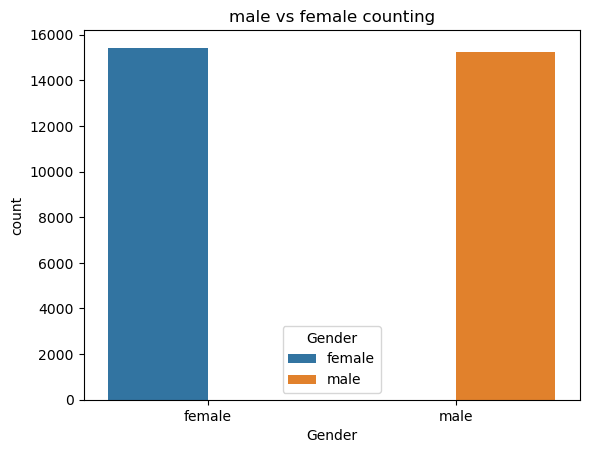

In [15]:
sns.countplot(x='Gender',data=df,hue='Gender')
plt.title('male vs female counting')
plt.show()

In [16]:
df['EthnicGroup'].value_counts()

group C    9816
group D    7986
group B    6192
group E    4288
group A    2359
Name: EthnicGroup, dtype: int64

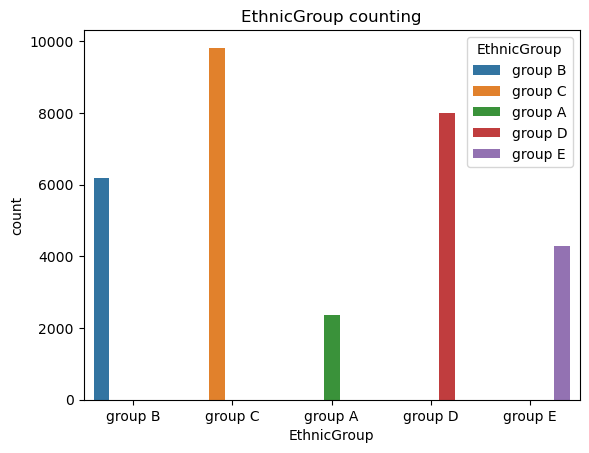

In [17]:
sns.countplot(x='EthnicGroup',data=df,hue='EthnicGroup')
plt.title('EthnicGroup counting')
plt.show()

In [18]:
df['ParentEduc'].value_counts()

some college          7048
high school           6031
some high school      5907
associate's degree    5902
bachelor's degree     3600
master's degree       2153
Name: ParentEduc, dtype: int64

#### Note:-Making an assumption that "some college" is equal to "bachelor's degree" and "high school" is equal to "some high school"

In [19]:
df['ParentEduc']=df['ParentEduc'].replace('some high school','high school')

In [20]:
df['ParentEduc']=df['ParentEduc'].replace('some college',"bachelor's degree")

In [21]:
df['ParentEduc'].value_counts()

high school           11938
bachelor's degree     10648
associate's degree     5902
master's degree        2153
Name: ParentEduc, dtype: int64

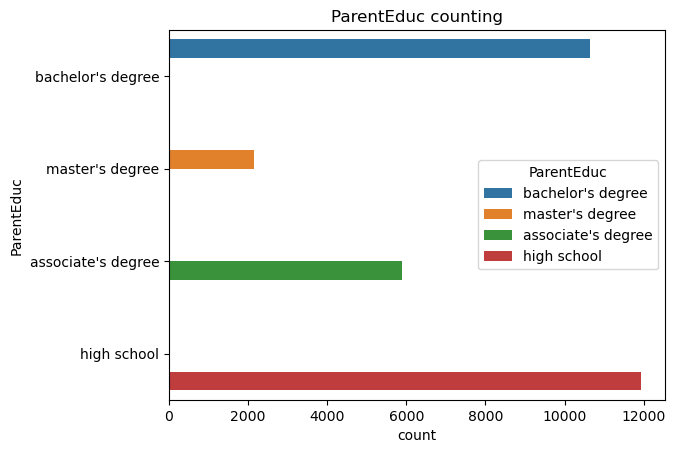

In [22]:
sns.countplot(y='ParentEduc',data=df,hue='ParentEduc')
plt.title('ParentEduc counting')
plt.show()

In [23]:
df['LunchType'].value_counts()

standard        19905
free/reduced    10736
Name: LunchType, dtype: int64

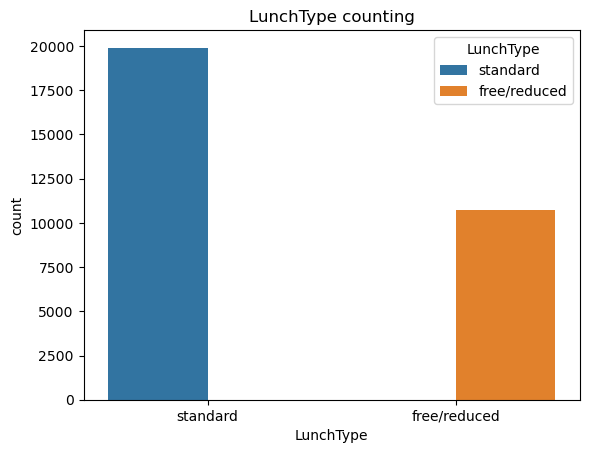

In [24]:
sns.countplot(x='LunchType',data=df,hue='LunchType')
plt.title('LunchType counting')
plt.show()

In [25]:
df['TestPrep'].value_counts()

none         20068
completed    10573
Name: TestPrep, dtype: int64

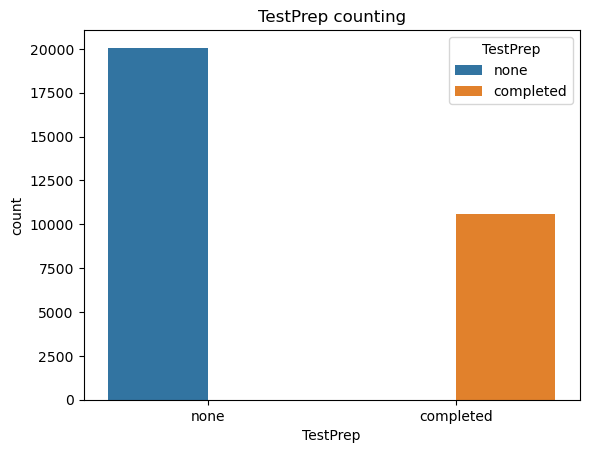

In [26]:
sns.countplot(x='TestPrep',data=df,hue='TestPrep')
plt.title('TestPrep counting')
plt.show()

(array([6.000e+00, 3.900e+01, 2.120e+02, 9.800e+02, 2.832e+03, 5.605e+03,
        7.474e+03, 7.013e+03, 4.462e+03, 2.018e+03]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

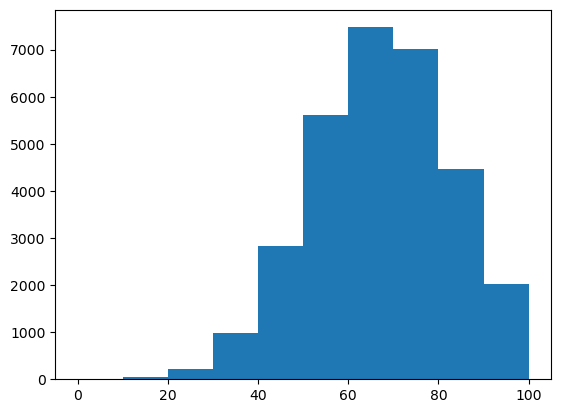

In [27]:
plt.hist(df['MathScore'])

(array([  17.,   68.,  333., 1232., 3091., 5640., 7046., 6341., 4430.,
        2443.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

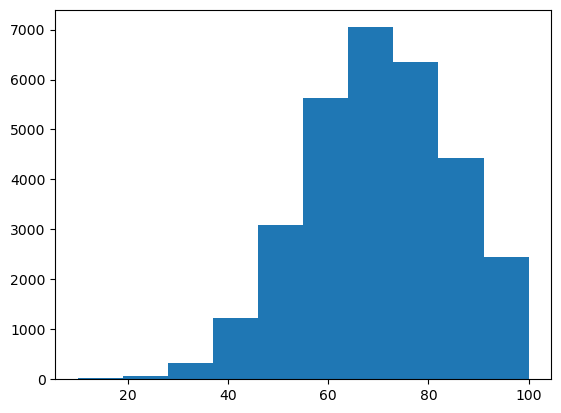

In [28]:
plt.hist(df['ReadingScore'])

(array([   8.,   58.,  300., 1125., 3217., 5224., 7509., 6164., 4630.,
        2406.]),
 array([  5. ,  14.5,  24. ,  33.5,  43. ,  52.5,  62. ,  71.5,  81. ,
         90.5, 100. ]),
 <BarContainer object of 10 artists>)

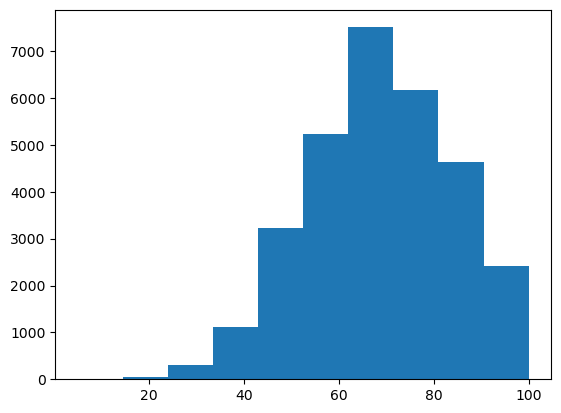

In [29]:
plt.hist(df['WritingScore'])

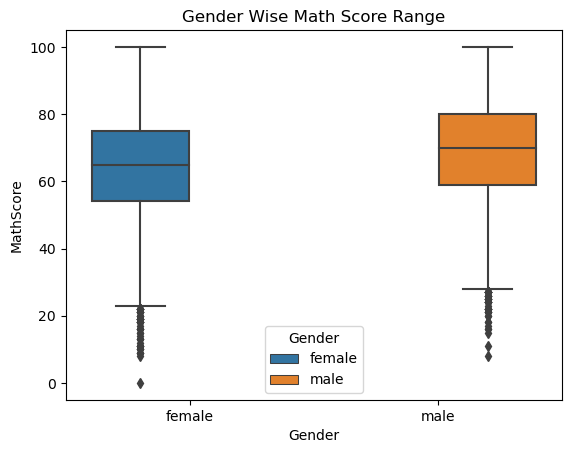

In [30]:
sns.boxplot(x='Gender',y='MathScore',data=df,hue='Gender')
plt.title('Gender Wise Math Score Range')
plt.show()

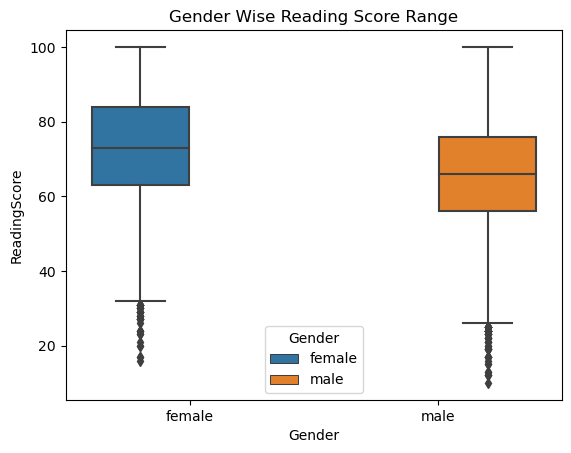

In [31]:
sns.boxplot(x='Gender',y='ReadingScore',data=df,hue='Gender')
plt.title('Gender Wise Reading Score Range')
plt.show()

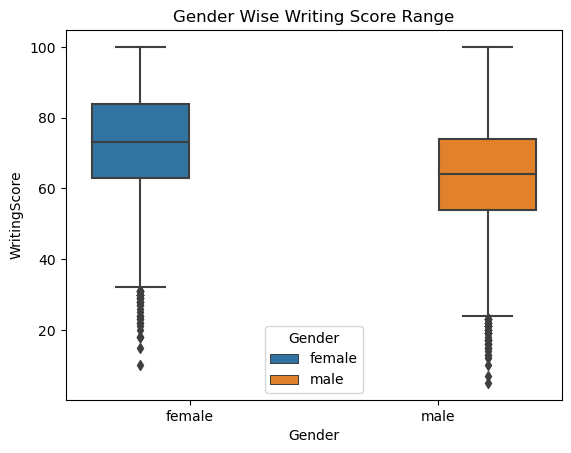

In [32]:
sns.boxplot(x='Gender',y='WritingScore',data=df,hue='Gender')
plt.title('Gender Wise Writing Score Range')
plt.show()

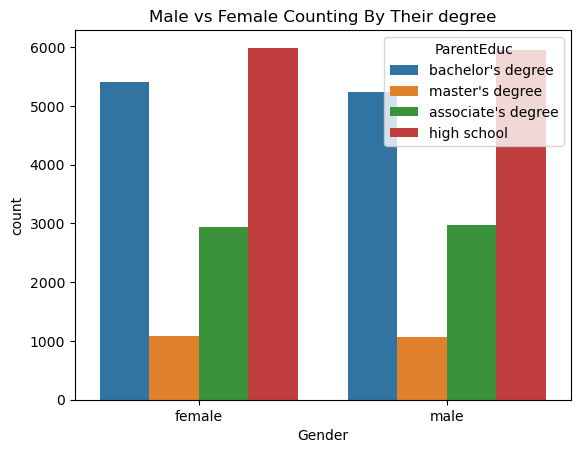

In [33]:
sns.countplot(x='Gender',hue='ParentEduc',data=df)
plt.title('Male vs Female Counting By Their degree')
plt.show()

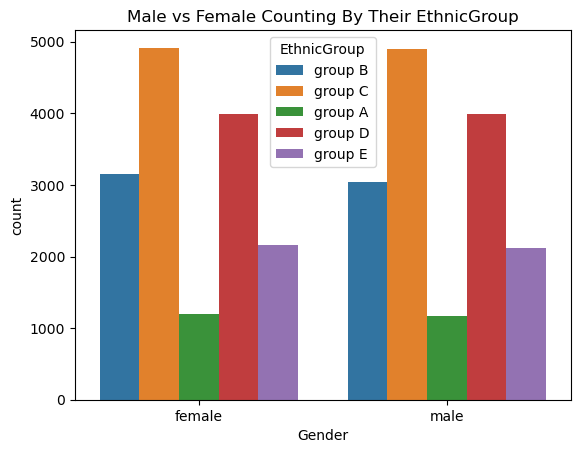

In [34]:
sns.countplot(x='Gender',hue='EthnicGroup',data=df)
plt.title('Male vs Female Counting By Their EthnicGroup')
plt.show()

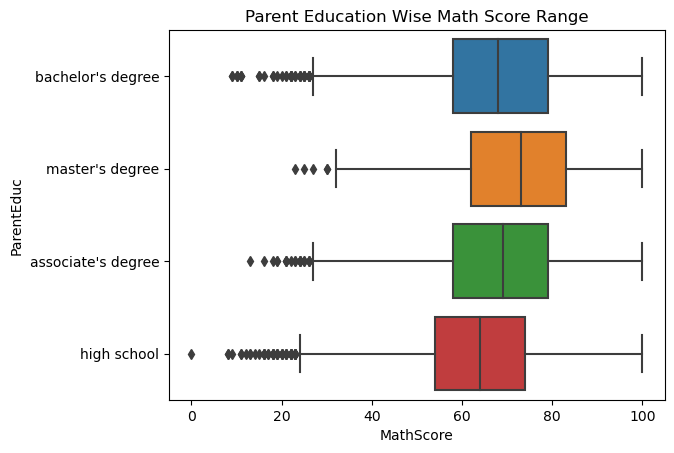

In [35]:
sns.boxplot(y='ParentEduc',x='MathScore',data=df)
plt.title('Parent Education Wise Math Score Range')
plt.show()

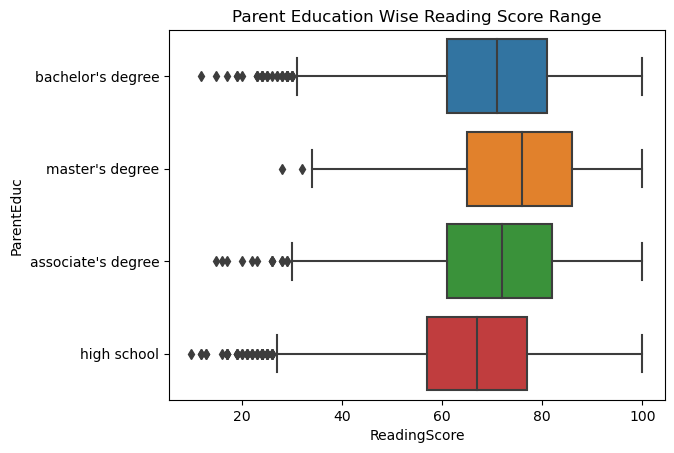

In [36]:
sns.boxplot(y='ParentEduc',x='ReadingScore',data=df)
plt.title('Parent Education Wise Reading Score Range')
plt.show()

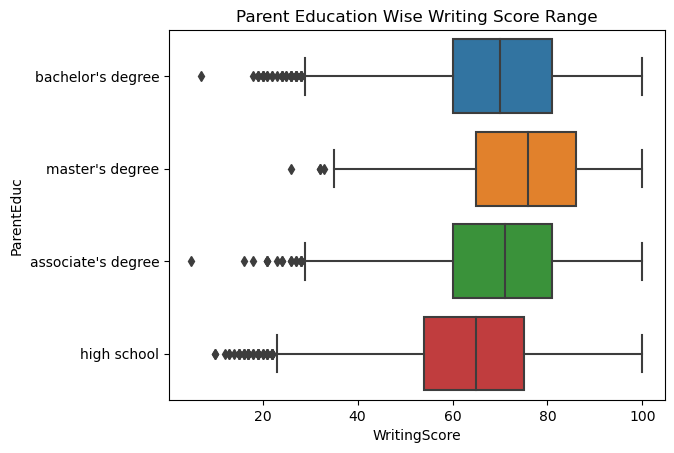

In [37]:
sns.boxplot(y='ParentEduc',x='WritingScore',data=df)
plt.title('Parent Education Wise Writing Score Range')
plt.show()

In [38]:
df['percentage']=((df['MathScore']+df['ReadingScore']+df['WritingScore'])/300)*100

In [39]:
df.head()

,no_name,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,percentage
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,1,female,group C,bachelor's degree,standard,completed,69,90,88,82.333333
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,4,male,group C,bachelor's degree,standard,none,76,78,75,76.333333


In [40]:
def grade(x):
    if x>=90.0:
        return "A"
    elif x>=80.0 and x<90.0:
        return "B"
    elif x>=70.0 and x<80.0:
        return "C"
    elif x>=60.0 and x<70.0:
        return "D"
    elif x>=50.0 and x<60.0:
        return "E"
    elif x>=40.0 and x<50.0:
        return "F"
    elif x>=30.0 and x<40.0:
        return "G"
    else:
        return "Fail"

In [41]:
df['grade_math']=df['MathScore'].apply(grade)

In [42]:
df['grade_writing']=df['WritingScore'].apply(grade)

In [43]:
df['grade_reading']=df['ReadingScore'].apply(grade)

In [44]:
df['grade']=df['percentage'].apply(grade)

In [45]:
df.head()

,no_name,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,percentage,grade_math,grade_writing,grade_reading,grade
0,0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C,C,C,C
1,1,female,group C,bachelor's degree,standard,completed,69,90,88,82.333333,D,B,A,B
2,2,female,group B,master's degree,standard,none,90,95,93,92.666667,A,A,A,A
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,F,F,E,F
4,4,male,group C,bachelor's degree,standard,none,76,78,75,76.333333,C,C,C,C


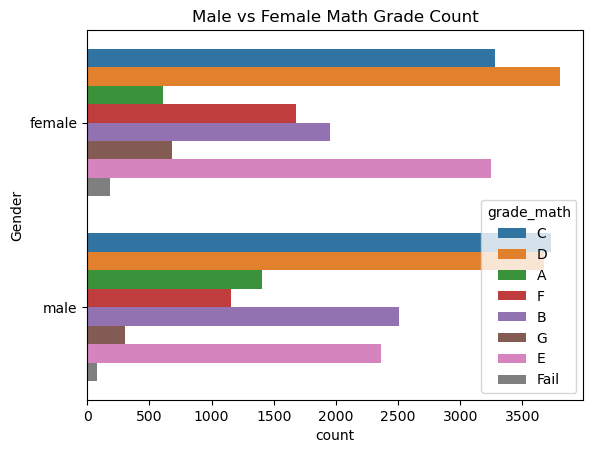

In [46]:
sns.countplot(y='Gender',hue='grade_math',data=df)
plt.title('Male vs Female Math Grade Count')
plt.show()

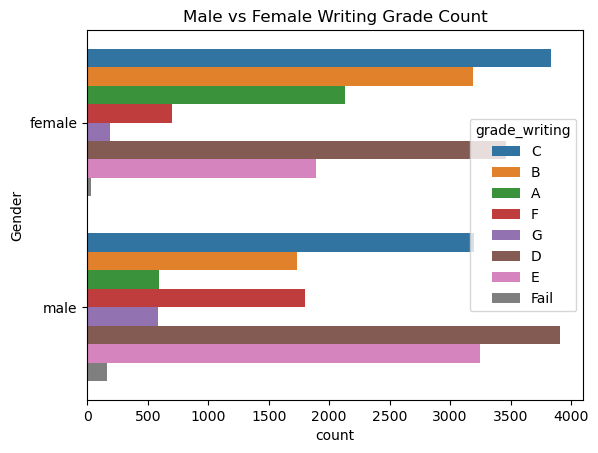

In [47]:
sns.countplot(y='Gender',hue='grade_writing',data=df)
plt.title('Male vs Female Writing Grade Count')
plt.show()

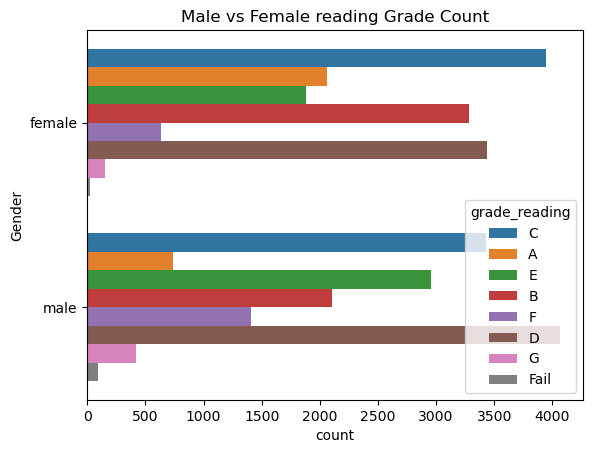

In [48]:
sns.countplot(y='Gender',hue='grade_reading',data=df)
plt.title('Male vs Female reading Grade Count')
plt.show()

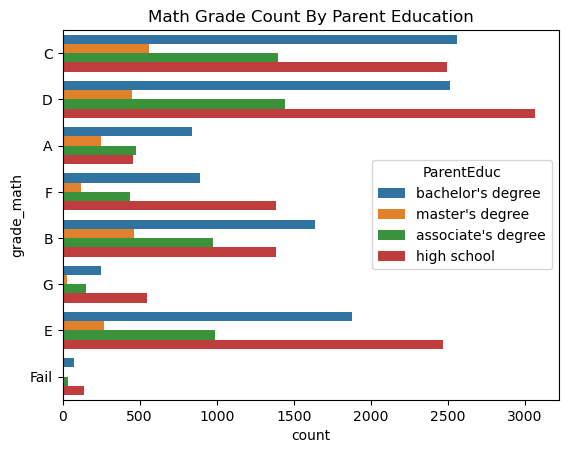

In [49]:
sns.countplot(y='grade_math',hue='ParentEduc',data=df)
plt.title('Math Grade Count By Parent Education')
plt.show()

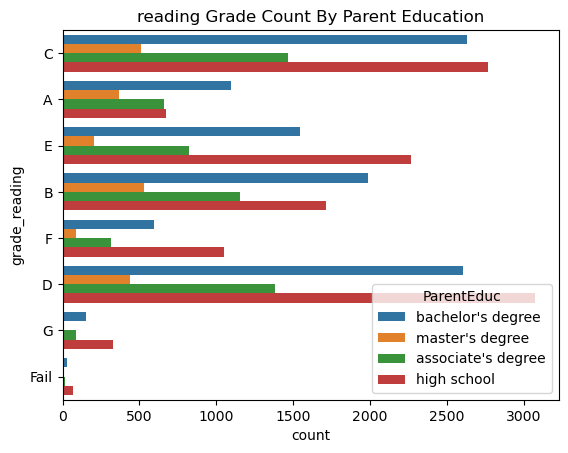

In [50]:
sns.countplot(y='grade_reading',hue='ParentEduc',data=df)
plt.title('reading Grade Count By Parent Education')
plt.show()

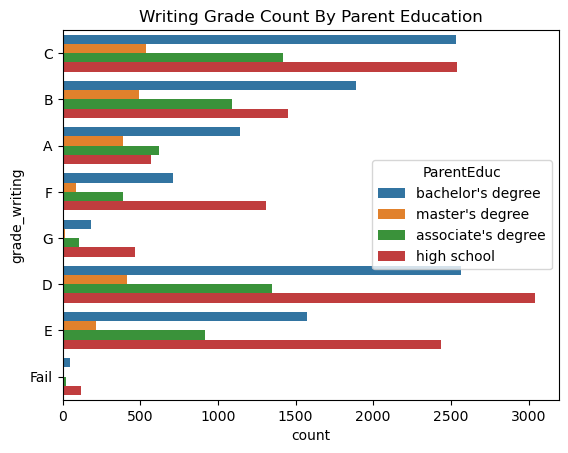

In [51]:
sns.countplot(y='grade_writing',hue='ParentEduc',data=df)
plt.title('Writing Grade Count By Parent Education')
plt.show()

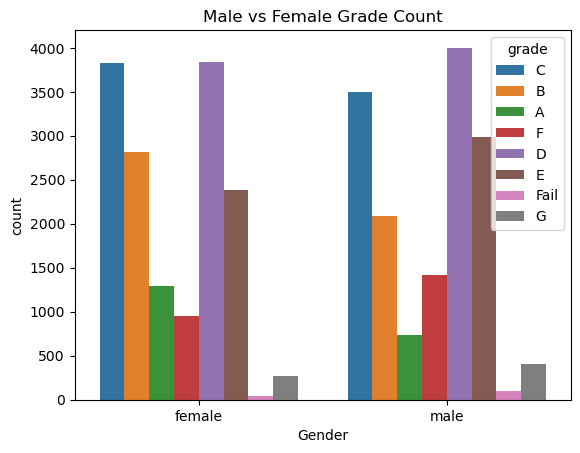

In [52]:
sns.countplot(x='Gender',hue='grade',data=df)
plt.title('Male vs Female Grade Count')
plt.show()

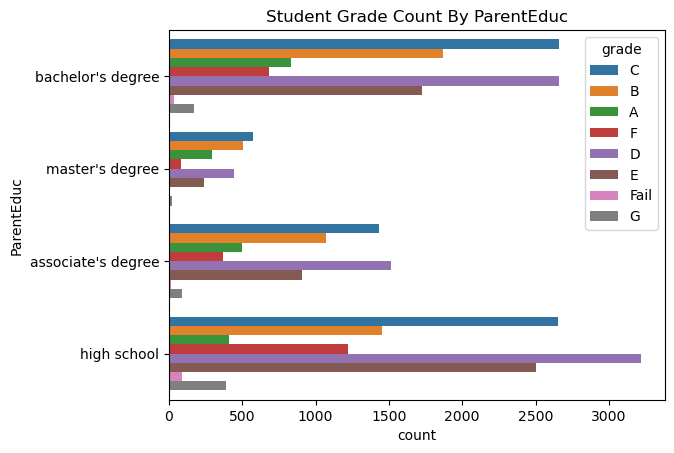

In [53]:
sns.countplot(y='ParentEduc',hue='grade',data=df)
plt.title('Student Grade Count By ParentEduc')
plt.show()

### Statistical Data Analysis
#### Taking alpha level=0.05
#### pvalue<=alpha level i.e. alternate hypothesis accepted
#### pvalue>=alpha level i.e. null hypothesis accepted
#### h1=h2,null hypothesis i.e. there is no significant difference
#### h1!=h2,alternate hypothesis i.e. there is significant difference

### Is there significant difference between gender with their mean maths score?
#### Using T-Test

In [54]:
spy.ttest_ind(df[df['Gender']=='male']['MathScore'],df[df['Gender']=='female']['MathScore'],equal_var=True)

Ttest_indResult(statistic=29.215194790178366, pvalue=4.3175109560336834e-185)

#### here,pvalue is lower than alpha so alternate hypothesis is accepted i.e. there is significant difference between gender with their mean maths score.

### Is there significant difference between gender with their mean reading score?¶
#### Using T-Test

In [55]:
spy.ttest_ind(df[df['Gender']=='male']['ReadingScore'],df[df['Gender']=='female']['ReadingScore'],equal_var=True)

Ttest_indResult(statistic=-42.89946401231943, pvalue=0.0)

#### here,pvalue is lower than alpha so alternate hypothesis is accepted i.e. there is significant difference between gender with their mean reading score.

### Is there significant difference between gender with their mean writing score?¶
#### Using T-Test

In [56]:
spy.ttest_ind(df[df['Gender']=='male']['WritingScore'],df[df['Gender']=='female']['WritingScore'],equal_var=True)

Ttest_indResult(statistic=-53.30458573014465, pvalue=0.0)

#### here,pvalue is lower than alpha so alternate hypothesis is accepted i.e. there is significant difference between gender with their mean writing score.

### Is there significance difference between ethnic group and their mean maths score?
#### Using Annova test

In [57]:
group_a=df[df['EthnicGroup']=='group A']['MathScore']
group_b=df[df['EthnicGroup']=='group B']['MathScore']
group_c=df[df['EthnicGroup']=='group C']['MathScore']
group_d=df[df['EthnicGroup']=='group D']['MathScore']
group_e=df[df['EthnicGroup']=='group E']['MathScore']

In [58]:
spy.f_oneway(group_a,group_b,group_c,group_d,group_e)

F_onewayResult(statistic=531.144417412319, pvalue=0.0)

#### here,pvalue is lower than alpha so alternate hypothesis is accepted i.e. there is significant difference between ethnic group with their mean maths score.

### Is there significance difference between ethnic group and their mean reading score?
#### Using Annova test

In [59]:
group_a=df[df['EthnicGroup']=='group A']['ReadingScore']
group_b=df[df['EthnicGroup']=='group B']['ReadingScore']
group_c=df[df['EthnicGroup']=='group C']['ReadingScore']
group_d=df[df['EthnicGroup']=='group D']['ReadingScore']
group_e=df[df['EthnicGroup']=='group E']['ReadingScore']

In [60]:
spy.f_oneway(group_a,group_b,group_c,group_d,group_e)

F_onewayResult(statistic=191.02328288120847, pvalue=4.866410606052015e-162)

#### here,pvalue is lower than alpha so alternate hypothesis is accepted i.e. there is significant difference between ethnic group with their mean reading score.

### Is there significance difference between ethnic group and their mean writing score?
#### Using Annova test

In [61]:
group_a=df[df['EthnicGroup']=='group A']['WritingScore']
group_b=df[df['EthnicGroup']=='group B']['WritingScore']
group_c=df[df['EthnicGroup']=='group C']['WritingScore']
group_d=df[df['EthnicGroup']=='group D']['WritingScore']
group_e=df[df['EthnicGroup']=='group E']['WritingScore']

In [62]:
spy.f_oneway(group_a,group_b,group_c,group_d,group_e)

F_onewayResult(statistic=226.22940874811385, pvalue=9.766347409336456e-192)

#### here,pvalue is lower than alpha so alternate hypothesis is accepted i.e. there is significant difference between ethnic group with their mean writing score.

### Is there any association between gender and their Parent Eduation?
#### Using chi square test

In [63]:
cross_table_1=pd.crosstab(df['Gender'],df['ParentEduc'])
cross_table_1

ParentEduc,associate's degree,bachelor's degree,high school,master's degree
Gender,,,,
female,2934,5410,5992,1088
male,2968,5238,5946,1065


In [64]:
spy.chi2_contingency(cross_table_1,correction=True)

Chi2ContingencyResult(statistic=1.998851539913398, pvalue=0.5726451058832216, dof=3, expected_freq=array([[2970.93593551, 5359.9671029 , 6009.32449985, 1083.77246173],
       [2931.06406449, 5288.0328971 , 5928.67550015, 1069.22753827]]))

#### here,pvalue is higher than alpha so null hypothesis is accepted i.e. there is no association between gender and their Parent Education.

### Is there any association between gender and their Preperation?
#### Using chi square test

In [65]:
cross_table_2=pd.crosstab(df['Gender'],df['TestPrep'])
cross_table_2

TestPrep,completed,none
Gender,,
female,5363,10061
male,5210,10007


In [66]:
spy.chi2_contingency(cross_table_2,correction=True)

Chi2ContingencyResult(statistic=0.9375485522555849, pvalue=0.33290908970645994, dof=1, expected_freq=array([[ 5322.21376587, 10101.78623413],
       [ 5250.78623413,  9966.21376587]]))

#### here,pvalue is higher than alpha so null hypothesis is accepted i.e. there is no association between gender and their Preparation.

### Is there any association between gender and their group?
#### Using chi square test

In [67]:
cross_table_3=pd.crosstab(df['Gender'],df['EthnicGroup'])
cross_table_3

EthnicGroup,group A,group B,group C,group D,group E
Gender,,,,,
female,1192,3152,4917,3997,2166
male,1167,3040,4899,3989,2122


In [68]:
spy.chi2_contingency(cross_table_3,correction=True)

Chi2ContingencyResult(statistic=1.384939252427838, pvalue=0.84680837747091, dof=4, expected_freq=array([[1187.46829412, 3116.91550537, 4941.15675076, 4019.97532718,
        2158.48412258],
       [1171.53170588, 3075.08449463, 4874.84324924, 3966.02467282,
        2129.51587742]]))

#### here,pvalue is higher than alpha so null hypothesis is accepted i.e. there is no association between gender and their group.

### Is there any relation between reading and writing score?
#### Using Pearson Correlation Test

In [69]:
spy.pearsonr(df['ReadingScore'],df['WritingScore'])

PearsonRResult(statistic=0.9530945558568011, pvalue=0.0)

#### here,pearson correlation value is 0.95 close to 1 i.e. there is strong +ve relation between reading and writing score

### Is there any relation between maths and writing score?
#### Using Pearson Correlation Test

In [70]:
spy.pearsonr(df['MathScore'],df['WritingScore'])

PearsonRResult(statistic=0.8053536785572479, pvalue=0.0)

#### here,pearson correlation value is 0.80 close to 1 i.e. there is fairly +ve relation between maths and writing score

### Is there any relation between maths and reading score?
#### Using Pearson Correlation Test

In [71]:
spy.pearsonr(df['MathScore'],df['ReadingScore'])

PearsonRResult(statistic=0.8173950613855684, pvalue=0.0)

#### here,pearson correlation value is 0.81 close to 1 i.e. there is fairly +ve relation between maths and reading score

## Thanks And Regards
### Anubhav Kumar Gupta